In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, r2_score, max_error
from sklearn.neighbors import KNeighborsClassifier



# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("data/exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [ ]:
df.describe().T

In [ ]:
sns.heatmap(df.corr(), cmap='RdYlGn')

In [ ]:
selected_features = df[["koi_period","koi_period_err1","koi_period_err2","koi_time0bk","koi_time0bk_err1",
                     "koi_steff_err2","koi_slogg","koi_slogg_err1","koi_slogg_err2","koi_srad",
                     "koi_srad_err1","koi_srad_err2","ra","dec","koi_kepmag"]]

In [ ]:
selected_features.corr()

In [ ]:
sns.heatmap(selected_features.corr(), cmap='RdYlGn')

In [ ]:
# Check for null values
df.info(verbose=True)

In [ ]:
df.shape

In [ ]:
df.isnull().sum()

In [ ]:
sns.countplot(df['koi_disposition'])

In [ ]:
# Set features. This will also be used as your x values.


# Create a Train Test Split

Use `koi_disposition` for the y values

In [3]:
X = df.drop("koi_disposition", axis=1)
y = df["koi_disposition"]
print("Shape: ", X.shape, y.shape)


Shape:  (6991, 40) (6991,)


In [4]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [ ]:
X_train.head()

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [5]:
# scale the data
X_scaler = MinMaxScaler().fit(X_train)


In [6]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


# Train the Model



In [7]:
# loop through different k values to see which has the highest accuracy using odd numbers to ensure no ties
train_scores = []
test_scores = []

for k in range(1, 50, 2):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    train_score = model.score(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 1.000/0.796
k: 3, Train/Test Score: 0.896/0.810
k: 5, Train/Test Score: 0.873/0.825
k: 7, Train/Test Score: 0.869/0.819
k: 9, Train/Test Score: 0.857/0.820
k: 11, Train/Test Score: 0.850/0.820
k: 13, Train/Test Score: 0.849/0.817
k: 15, Train/Test Score: 0.846/0.817
k: 17, Train/Test Score: 0.842/0.814
k: 19, Train/Test Score: 0.838/0.816
k: 21, Train/Test Score: 0.837/0.818
k: 23, Train/Test Score: 0.834/0.815
k: 25, Train/Test Score: 0.833/0.812
k: 27, Train/Test Score: 0.831/0.811
k: 29, Train/Test Score: 0.830/0.813
k: 31, Train/Test Score: 0.829/0.815
k: 33, Train/Test Score: 0.829/0.819
k: 35, Train/Test Score: 0.829/0.818
k: 37, Train/Test Score: 0.829/0.815
k: 39, Train/Test Score: 0.830/0.814
k: 41, Train/Test Score: 0.830/0.814
k: 43, Train/Test Score: 0.829/0.810
k: 45, Train/Test Score: 0.830/0.812
k: 47, Train/Test Score: 0.829/0.814
k: 49, Train/Test Score: 0.830/0.816


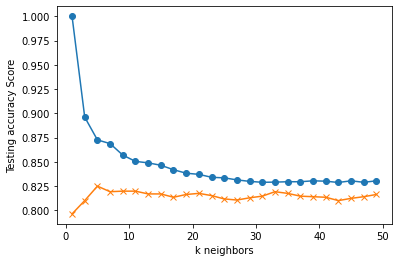

In [8]:
# plot data    
plt.plot(range(1, 50, 2), train_scores, marker='o')
plt.plot(range(1, 50, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [9]:
# Note that k: 9 provides the best accuracy where the classifier starts to stablize
model = KNeighborsClassifier(n_neighbors=33)
model.fit(X_train_scaled, y_train)
print(f"Training Data Score: {model.score(X_train_scaled, y_train):.4f}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test):.4f}")


Training Data Score: 0.8291
Testing Data Score: 0.8192


In [10]:
# predict test data set
y_pred = model.predict(X_test_scaled)


In [11]:
# check performance of model with classification report
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

     CANDIDATE       0.72      0.47      0.57       422
     CONFIRMED       0.62      0.80      0.70       450
FALSE POSITIVE       0.98      1.00      0.99       876

      accuracy                           0.82      1748
     macro avg       0.77      0.76      0.75      1748
  weighted avg       0.82      0.82      0.81      1748



In [23]:
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,CANDIDATE,CONFIRMED,FALSE POSITIVE,All
True,,,,
CANDIDATE,197,220,5,422
CONFIRMED,74,361,15,450
FALSE POSITIVE,2,0,874,876
All,273,581,894,1748


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [12]:
# example of grid searching key hyperparametres for KNeighborsClassifier
n_range = []

for i in range(1,50,2):
    n_range.append(i)

# define grid search
param_grid = {'n_neighbors': n_range, 
              'weights': ['uniform', 'distance'], 
              'metric': ['euclidean', 'manhattan', 'minkowski']}


In [13]:
grid = GridSearchCV(model, param_grid, n_jobs = -1, verbose = 3)


In [14]:
# Train the model with GridSearch (cross validate to determine hyper parameter values for best accuracy)
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   44.8s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  2.1min finished


GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=33), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29, 31, 33, 35, 37, 39, 41,
                                         43, 45, 47, 49],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [17]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

{'metric': 'manhattan', 'n_neighbors': 37, 'weights': 'distance'}
0.8407359972056266
KNeighborsClassifier(metric='manhattan', n_neighbors=37, weights='distance')


In [26]:
print(f"Training Data Score: {grid.score(X_train_scaled, y_train):.4f}")
print(f"Testing Data Score: {grid.score(X_test_scaled, y_test):.4f}")

Training Data Score: 1.0000
Testing Data Score: 0.8352


In [24]:
# Make predictions with the hypertuned model
predictions = grid.predict(X_test_scaled)

In [25]:
# check performance of model with classification report
print(classification_report(y_test, predictions))

                precision    recall  f1-score   support

     CANDIDATE       0.77      0.50      0.61       422
     CONFIRMED       0.64      0.84      0.73       450
FALSE POSITIVE       0.98      1.00      0.99       876

      accuracy                           0.84      1748
     macro avg       0.80      0.78      0.77      1748
  weighted avg       0.84      0.84      0.83      1748



In [28]:
confusion_matrix(y_test, predictions)
pd.crosstab(y_test, predictions, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,CANDIDATE,CONFIRMED,FALSE POSITIVE,All
True,,,,
CANDIDATE,210,207,5,422
CONFIRMED,59,376,15,450
FALSE POSITIVE,2,0,874,876
All,271,583,894,1748


# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash

filename = 'your_name.sav'
joblib.dump(your_model, filename)